## Introduction:
Image processing, a critical domain in computer vision, harnesses the prowess of linear algebra for transformative applications. This article delves into the intricacies of Singular Value Decomposition (SVD), Principal Component Analysis (PCA), and statistical methods, demonstrating their pivotal roles in enhancing images.

1. Singular Value Decomposition (SVD):
SVD is a cornerstone in image processing, providing a robust framework for image compression and reconstruction. By decomposing an image matrix into three matrices - U, Σ, and V^T, where U and V are orthogonal matrices and Σ is a diagonal matrix of singular values - SVD allows for efficient representation of images. The singular values capture essential information about the image, and by truncating them, one can achieve compression without significant loss of visual fidelity.

2. Principal Component Analysis (PCA):
PCA is another linchpin in image processing, employed for dimensionality reduction and feature extraction. By transforming the original pixel values into a new set of uncorrelated variables (principal components), PCA enables the concentration of image information in a reduced number of dimensions. This not only aids in efficient storage but also reveals the most significant features of an image, facilitating tasks such as facial recognition and object detection.

3. Statistics in Image Processing:
Statistical methods play a crucial role in understanding and manipulating image data. Measures like mean, standard deviation, and histogram analysis offer insights into the distribution and characteristics of pixel values. Histogram equalization, for instance, enhances image contrast by redistributing pixel intensities. Statistical techniques are also integral in filtering operations, where convolution masks leverage statistical properties for tasks like edge detection and noise reduction.

Applications:
- Medical Imaging: SVD and PCA find applications in medical image compression and feature extraction, aiding in diagnostics.
- Image Enhancement: Statistical methods contribute to contrast enhancement, while SVD enables efficient image denoising.
- Face Recognition: PCA plays a pivotal role in reducing facial feature dimensions for effective recognition systems.

Challenges and Future Directions:
Despite their efficacy, these linear algebra techniques face challenges such as sensitivity to noise and computational complexity. Ongoing research aims to address these issues, exploring novel algorithms and combining these methods with machine learning for more robust applications.


## Apply the SVD on images
In this example, we will use the SVD to extract the more important features from the image. It is nice to see the effect of the SVD on something very visual.

Let's start by loading an image in python and convert it to a Numpy array. We will convert it to grayscale to have one dimension per pixel. The shape of the matrix corresponds to the dimension of the image filled with intensity values: 1 cell per pixel.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


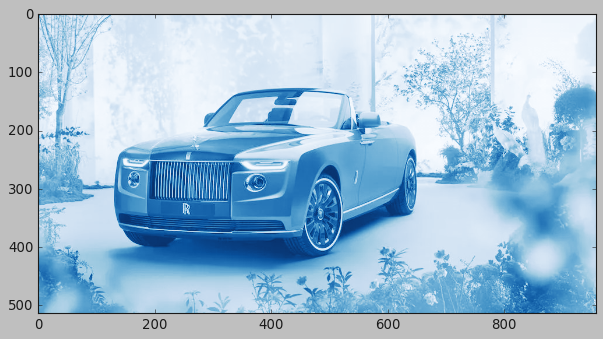

In [5]:
from PIL import Image

plt.style.use('classic')
img = Image.open('C://Users//Lenovo//Desktop//image//rr.jpg')
# convert image to Blues_r scale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='Blues_r')
plt.show()

###### Let's start to extract the left singular vectors, the singular values and the right singular vectors:

In [6]:
U, D, V = np.linalg.svd(imgmat)

In [7]:
imgmat.shape

(513, 958)

In [8]:
U.shape    

(513, 513)

In [9]:
D.shape

(513,)

In [10]:
V.shape

(958, 958)

###### 
Remember that D are the singular values that need to be put into a diagonal matrix. Also,V 
 doesn't need to be transposed (see above).

The singular vectors and singular values are ordered with the first ones corresponding to the more variance explained. For this reason, using just the first few singular vectors and singular values will provide the reconstruction of the principal elements of the image

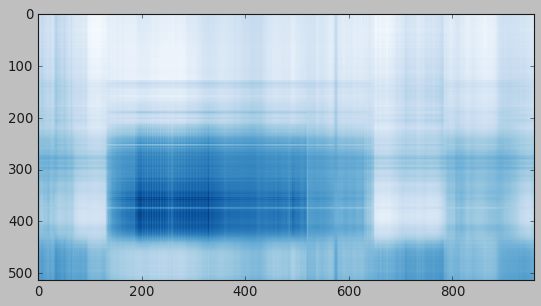

In [11]:
reconstimg = np.matrix(U[:, :2]) * np.diag(D[:2]) * np.matrix(V[:2, :])
plt.imshow(reconstimg, cmap='Blues_r')
plt.show()

##### We will now draw the reconstruction using different number of singular values.

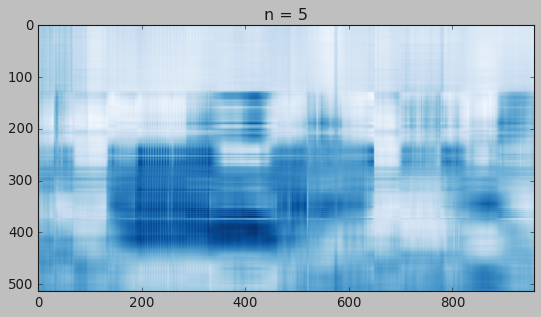

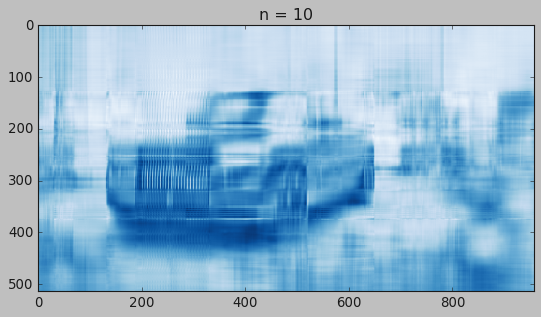

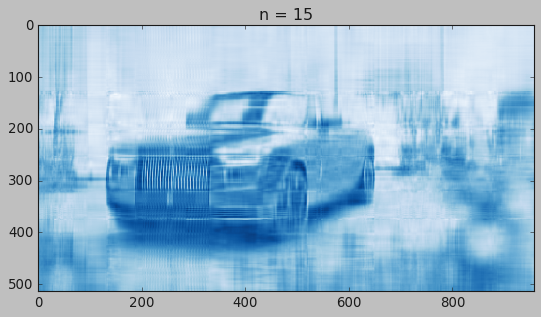

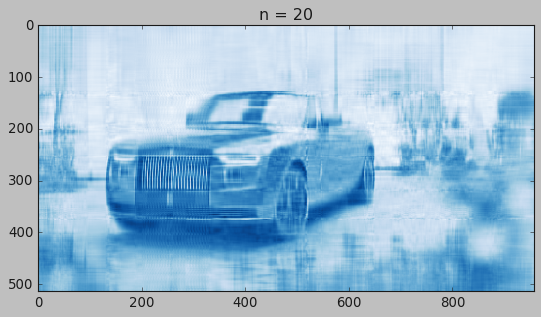

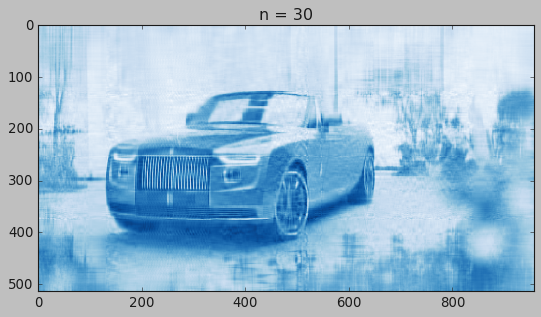

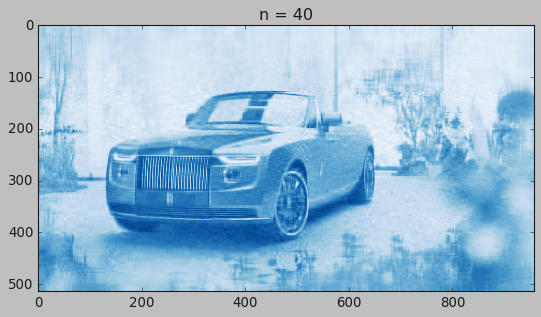

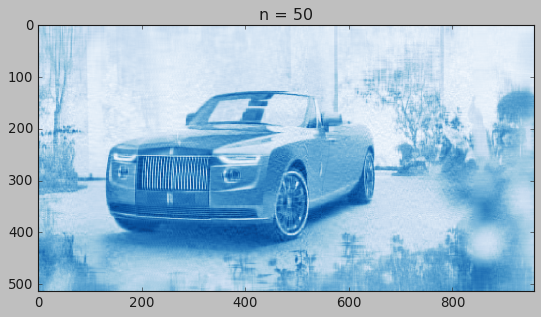

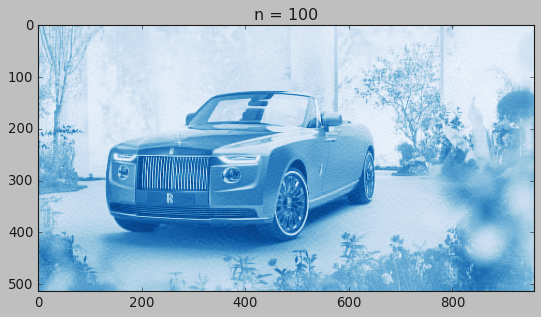

In [13]:
for i in [5, 10, 15, 20, 30, 40,50,100]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='Blues_r')
    title = "n = %s" % i
    plt.title(title)
    plt.show()
     


###### Whaou! Even with 100 components, the quality of the image is not bad!

## Conclusion
I like this chapter on the SVD because it uses what we have learned so far in a concrete application. The next chapter on the pseudo-inverse is quite cool as well so keep on reading! We will see how to find a near-solution of a system of equation that minimizes the error and at the end we will see an example that uses the pseudo-inverse to find the best fit line of a set of data points.